In [2]:

!pip install tensorflow==2.13.0
from tensorflow.keras.utils import to_categorical

!pip install keras_preprocessing
from keras_preprocessing.image import load_img

C:\Users\DEEPAK\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import numpy as np
import pandas as pd
import os


In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Dense, Conv2D, Dropout,Flatten,MaxPooling2D

In [6]:
train_dir=r"D:\from scratch try\train"
test_dir=r"D:\from scratch try\test"

In [7]:
def createdataframe(dir):
    images_paths = []
    labels = []
    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)
        for imagename in os.listdir(label_path):
            images_paths.append(os.path.join(label_path, imagename))
            labels.append(label)
        print(label, "completed")
    return images_paths, labels

In [9]:
train=pd.DataFrame()
train['train'],train['label']=createdataframe(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(train)

                                             train     label
0            D:\from scratch try\train\angry\0.jpg     angry
1            D:\from scratch try\train\angry\1.jpg     angry
2           D:\from scratch try\train\angry\10.jpg     angry
3        D:\from scratch try\train\angry\10002.jpg     angry
4        D:\from scratch try\train\angry\10016.jpg     angry
...                                            ...       ...
28816  D:\from scratch try\train\surprise\9969.jpg  surprise
28817  D:\from scratch try\train\surprise\9985.jpg  surprise
28818  D:\from scratch try\train\surprise\9990.jpg  surprise
28819  D:\from scratch try\train\surprise\9992.jpg  surprise
28820  D:\from scratch try\train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [11]:
test=pd.DataFrame()
test['test'],test['label']=createdataframe(test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(test)


                                            test     label
0       D:\from scratch try\test\angry\10052.jpg     angry
1       D:\from scratch try\test\angry\10065.jpg     angry
2       D:\from scratch try\test\angry\10079.jpg     angry
3       D:\from scratch try\test\angry\10095.jpg     angry
4       D:\from scratch try\test\angry\10121.jpg     angry
...                                          ...       ...
7061  D:\from scratch try\test\surprise\9806.jpg  surprise
7062  D:\from scratch try\test\surprise\9830.jpg  surprise
7063  D:\from scratch try\test\surprise\9853.jpg  surprise
7064  D:\from scratch try\test\surprise\9878.jpg  surprise
7065   D:\from scratch try\test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [13]:
from tqdm.notebook import tqdm

In [14]:
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def extract_features(test):
    features = []
    for img_path in tqdm(test):
        img = load_img(img_path, color_mode="grayscale", target_size=(48, 48))  # Ensure size matches your model's input
        img_array = img_to_array(img)  # Convert the image to an array
        features.append(img_array)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Reshape to (num_images, 48, 48, 1)
    return features


In [ ]:
train_features=extract_features(train['train'])

 47%|███████████████████████████████████▌                                        | 13467/28821 [02:39<02:48, 91.26it/s]

In [102]:
# If test is a list of image paths
test_features = extract_features(test)


100%|█████████████████████████████████████████████████████████████████████████████| 7066/7066 [01:10<00:00, 100.48it/s]


In [103]:
x_train=train_features/255.0
x_test=test_features/255.0

In [104]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [109]:
y_train=le.transform(train['label'])
test_labels = [os.path.basename(os.path.dirname(path)) for path in test]
y_test=le.transform(test_labels)

In [110]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [111]:

model = Sequential()
model=Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\DEEPAK\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [115]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.2338 - loss: 1.8388 - val_accuracy: 0.2570 - val_loss: 1.7970
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.2531 - loss: 1.7943 - val_accuracy: 0.3423 - val_loss: 1.6689
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.3334 - loss: 1.6579 - val_accuracy: 0.4372 - val_loss: 1.4553
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.4057 - loss: 1.5169 - val_accuracy: 0.4723 - val_loss: 1.3691
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.4496 - loss: 1.4344 - val_accuracy: 0.4919 - val_loss: 1.3134
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.4657 - loss: 1.3916 - val_accuracy: 0.5115 - val_loss: 1.2657
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.4796 - loss: 1.3474 - val_accuracy: 0.5116 - val_loss: 1.2713
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.4890 - loss: 1.3283 - val_accu

In [120]:
model_json=model.to_json()
with open(" emotiondetector.json",'w')as json_file:
    json_file.write(model_json)
    
model.save("emotiondetector.h5")

In [121]:
from keras.models import model_from_json

In [131]:
json_file=open(r"D:\from scratch try\ emotiondetector.json")

In [1]:
json_file=open(r"D:\from scratch try\ emotiondetector.json","r")
model_json=json_file.read()
json_file.close()
model=model_from_json(model_json)
model.load_weights("emotiondetector.h5")

NameError: name 'model_from_json' is not defined

In [ ]:
label=["angry","disgust","fear","happy","neutral","sad"]

In [ ]:
def ef(image):
    img=load_img(image,color_mode='grayscale')
    feature=np.array(img)
    feature=feature.reshape(1,48,48,1)
    return feature/255.0

In [157]:
image=r"D:\from scratch try\test\angry\1717.jpg"
print("original image is angry")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model predcition is",pred_label)

original image is angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
model predcition is angry


In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is happy


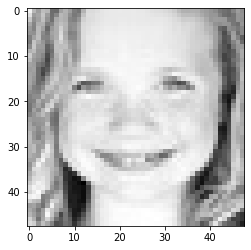

In [172]:
image=r"D:\from scratch try\test\happy\62.jpg"
print("original image is happy")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap="gray")

original image is angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is sad


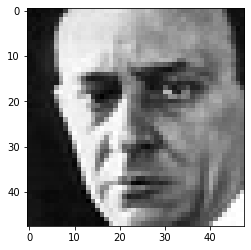

In [171]:
image=r"D:\from scratch try\test\angry\608.jpg"
print("original image is angry")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap="gray")

original image is fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is fear


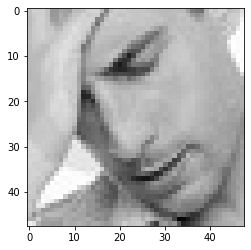

In [174]:
image=r"D:\from scratch try\test\fear\689.jpg"
print("original image is fear")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap="gray")
